this is my incredibly foolish algorithm for the faces

In [17]:
import os

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
# celebs = os.listdir("../faces")
# faces = []
#
# for celeb in celebs:
#     pictures = os.listdir("../faces/{}".format(celeb))
#     for picture in pictures:
#         try:
#             faces.append(np.asarray(Image.open("../faces/{}/{}".format(celeb, picture))))
#         except Exception as e:
#             print(e)
#
# faces

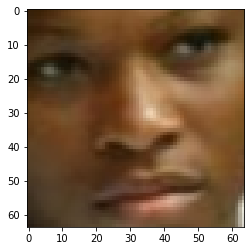

In [40]:
celebs = os.listdir("../cropped_faces")
faces = []

for celeb in celebs:
    faces.append(np.asarray(Image.open("../cropped_faces/{}".format(celeb))))
    # pictures = os.listdir("../cropped_faces/{}".format(celeb))
    # for picture in pictures:
    #     try:
    #         faces.append(np.asarray(Image.open("../cropped_faces/{}/{}".format(celeb, picture))))
    #     except Exception as e:
    #         print(e)

face_array = np.array(faces)
plt.imshow(face_array[np.random.randint(0, len(face_array))], cmap=plt.cm.rainbow)

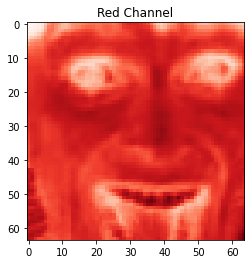

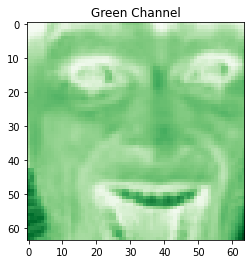

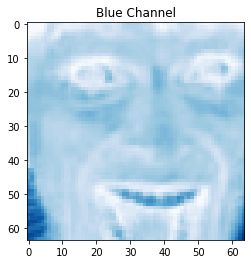

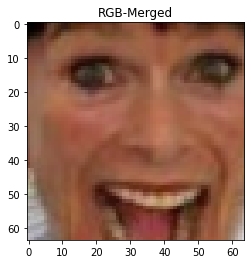

In [116]:
random_face = face_array[np.random.randint(0, len(face_array))]
random_red, random_green, random_blue = np.dsplit(random_face, 3)
plt.title("Red Channel")
plt.imshow(random_red, cmap=plt.cm.Reds)
plt.show()
plt.title("Green Channel")
plt.imshow(random_green, cmap=plt.cm.Greens)
plt.show()
plt.title("Blue Channel")
plt.imshow(random_blue, cmap=plt.cm.Blues)
plt.show()
plt.title("RGB-Merged")
plt.imshow(np.dstack((random_red, random_green, random_blue)))

In [126]:
def pca(X, n_pc):
    mean = np.mean(X, axis=0)
    centered_data = X - mean # Subtracting the mean from the data
    U, S, V = np.linalg.svd(centered_data) # Taking the SVD from the data
    components = V[:n_pc] # Extracting the principal components
    projected = U[:,:n_pc]*S[:n_pc]

    return projected, components, mean, centered_data

In [73]:
face_array = np.array(faces)

# Splitting up the colored images into their RGB Channels
red, green, blue = np.split(face_array, 3, axis=3)

(13233, 64, 64, 1)

In [124]:
def eigenfaces(data, faces=50):
    samples, h, w, d = data.shape
    X = data.reshape(samples, h*w) # vectorizing the images
    P, C, M, Y = pca(X, n_pc=faces) # running PCA with the number of principal components specified
    return C.reshape((faces, h, w)) #reshaping the principal components to be images

In [136]:
def merge(red, green, blue):
    return np.dstack((red, green, blue)).astype(int)

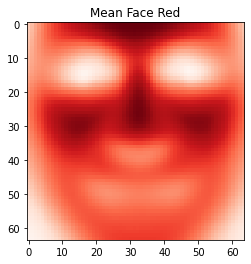

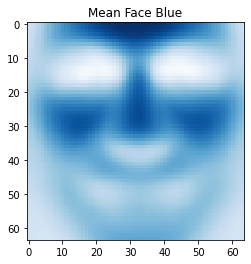

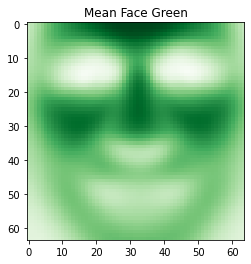

In [74]:
red_mean = np.mean(red, axis=0)
green_mean = np.mean(green, axis=0)
blue_mean = np.mean(blue, axis=0)

plt.title("Mean Face Red")
plt.imshow(red_mean, cmap=plt.cm.Reds)
plt.show()

plt.title("Mean Face Blue")
plt.imshow(blue_mean, cmap=plt.cm.Blues)
plt.show()

plt.title("Mean Face Green")
plt.imshow(green_mean, cmap=plt.cm.Greens)
plt.show()

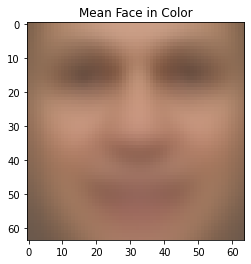

In [150]:
mean_face = merge(red_mean, green_mean, blue_mean)
plt.title("Mean Face in Color")
plt.imshow(mean_face)

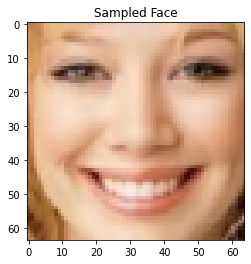

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


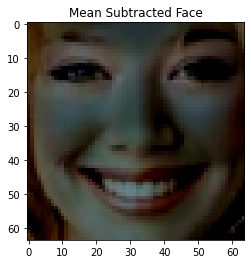

In [118]:
random_face = face_array[np.random.randint(0, len(face_array))]
plt.title("Sampled Face")
plt.imshow(random_face)
plt.show()

plt.title("Mean Subtracted Face")
plt.imshow(random_face - mean_face)

In [143]:
num_faces = 50
%time red_eigenface_array = eigenfaces(red, num_faces)

CPU times: user 9min 18s, sys: 15.8 s, total: 9min 34s
Wall time: 1min 42s


In [144]:
%time green_eigenface_array = eigenfaces(green, num_faces)

CPU times: user 9min 10s, sys: 14.6 s, total: 9min 24s
Wall time: 1min 39s


In [146]:
%time blue_eigenface_array = eigenfaces(blue, num_faces)

CPU times: user 9min 10s, sys: 14.4 s, total: 9min 24s
Wall time: 1min 39s
CPU times: user 9min 7s, sys: 19 s, total: 9min 26s
Wall time: 1min 40s


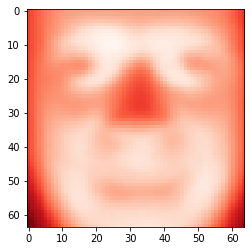

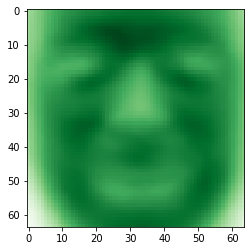

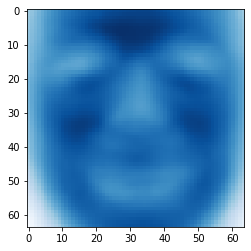

In [191]:
plt.imshow(red_eigenface_array[0], cmap=plt.cm.Reds)
plt.show()
plt.imshow(green_eigenface_array[0], cmap=plt.cm.Greens)
plt.show()
plt.imshow(blue_eigenface_array[0], cmap=plt.cm.Blues)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


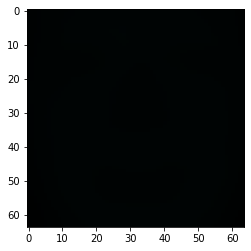

In [200]:
scaling = 1
translation = 0
merged = np.dstack((scaling * red_eigenface_array[0] + translation, scaling * green_eigenface_array[0] + translation, scaling * blue_eigenface_array[0] + translation))
plt.imshow(merged)

# merged